In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve , auc
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\user\AppData\Local\Temp\ipykernel_10576\1219933923.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:
data = pd.read_csv('heart.csv')
X = data.drop('output', axis=1)  # Features
y = data['output']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state =42)

In [12]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
accuracy = accuracy_score (y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [14]:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

Recall: 0.84


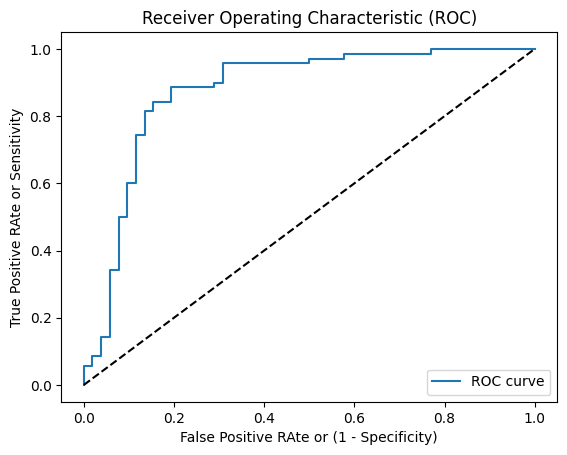

In [15]:
fpr, tpr, thresholds =roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1], 'k--') #random predictions curve
plt.xlabel('False Positive RAte or (1 - Specificity)')
plt.ylabel('True Positive RAte or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [16]:
#AUC area under the curve
roc_auc =auc(fpr,tpr)
print(f'AUC:{roc_auc:.2f}')

AUC:0.88
